In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df1 = pd.read_csv(r"https://raw.githubusercontent.com/Perovsky56/BankLoanModel/refs/heads/main/datasets/Loan.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
print(df1.columns)

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')


In [6]:
print(df1.head(3))

  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  \
0         Master          22       13152            48       Married   
1      Associate          15       26045            48        Single   
2       Bachelor          26       17627            36       Married   

   NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0                   2                 Own                  183   
1                   1            Mortgage                  496   
2                   2                Rent                  902   

   CreditCardUtilizationRate  NumberOfOpenCreditLines  \
0                   0.354418                        1   
1                   0.087827                       

In [3]:
df1 = df1.drop(['ApplicationDate', 'CreditScore', 'HomeOwnershipStatus', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'UtilityBillsPaymentHistory', 'BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'], axis=1)

In [8]:
df1.head(3)

,Age,AnnualIncome,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,MonthlyDebtPayments,BankruptcyHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,MonthlyLoanPayment
0,45,39948,Employed,Master,22,13152,48,Married,2,183,0,7632,1202,146111,19183,3329.000000,11,126928,419.805992
1,38,39709,Employed,Associate,15,26045,48,Single,1,496,0,4627,3460,53204,9595,3309.083333,3,43609,794.054238
2,47,40724,Employed,Bachelor,26,17627,36,Married,2,902,0,886,895,25176,128874,3393.666667,6,5205,666.406688


In [4]:
columns_to_move = ['LoanAmount', 'LoanDuration']

cols = [col for col in df1.columns if col not in columns_to_move] + columns_to_move
df1 = df1[cols]

In [5]:
df1.sample(15)

,Age,AnnualIncome,EmploymentStatus,EducationLevel,Experience,MaritalStatus,NumberOfDependents,MonthlyDebtPayments,BankruptcyHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,MonthlyLoanPayment,LoanAmount,LoanDuration
1677,58,38673,Employed,Doctorate,38,Married,1,223,0,5257,1471,78706,74588,3222.750000,8,4118,1143.080269,40083,60
15092,54,49826,Self-Employed,Doctorate,35,Divorced,3,604,0,2202,499,87804,43072,4152.166667,4,44732,949.240137,29378,48
15104,47,60650,Employed,High School,24,Single,0,311,0,1583,3620,112666,1953,5054.166667,6,110713,497.577417,20901,108
12574,49,31065,Employed,Bachelor,30,Married,2,306,0,1960,875,29360,52643,2588.750000,3,1969,908.553109,34285,60
18819,30,66858,Employed,Bachelor,8,Single,1,735,0,7205,512,40647,11667,5571.500000,4,28980,343.857197,8865,36
13710,32,37195,Employed,Associate,9,Divorced,0,544,0,12556,1599,139672,150149,3099.583333,5,3222,997.381536,36607,72
15411,49,45678,Self-Employed,Associate,28,Married,2,466,0,1401,4081,33488,15139,3806.500000,4,18349,1028.356717,33109,60
2289,57,43944,Self-Employed,Master,30,Divorced,2,301,0,1649,1767,106208,4526,3662.000000,9,101682,507.627120,16187,48
12844,65,41933,Employed,High School,44,Divorced,3,543,0,4032,2607,62830,14889,3494.416667,4,47941,271.835456,11562,72
16960,20,66252,Employed,Master,0,Married,0,655,0,1780,3267,129764,8204,5521.000000,4,121560,553.525050,18431,96


In [11]:
df1.shape

(20000, 19)

In [12]:
df1.dtypes

Age                         int64
AnnualIncome                int64
EmploymentStatus           object
EducationLevel             object
Experience                  int64
MaritalStatus              object
NumberOfDependents          int64
MonthlyDebtPayments         int64
BankruptcyHistory           int64
SavingsAccountBalance       int64
CheckingAccountBalance      int64
TotalAssets                 int64
TotalLiabilities            int64
MonthlyIncome             float64
JobTenure                   int64
NetWorth                    int64
MonthlyLoanPayment        float64
LoanAmount                  int64
LoanDuration                int64
dtype: object

In [13]:
df1.describe()

,Age,AnnualIncome,Experience,NumberOfDependents,MonthlyDebtPayments,BankruptcyHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,MonthlyLoanPayment,LoanAmount,LoanDuration
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,17.522750,1.517300,454.292700,0.052400,4946.052150,1782.555100,9.696440e+04,3.625241e+04,4891.715521,5.002650,7.229432e+04,911.607052,24882.867800,54.057000
std,11.622713,40350.845168,11.316836,1.386325,240.507609,0.222838,6604.887477,2245.378812,1.207999e+05,4.725151e+04,3296.771598,2.236804,1.179200e+05,674.583473,13427.421217,24.664857
min,18.000000,15000.000000,0.000000,0.000000,50.000000,0.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,1250.000000,0.000000,1.000000e+03,97.030193,3674.000000,12.000000
25%,32.000000,31679.000000,9.000000,0.000000,286.000000,0.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,2629.583333,3.000000,8.734750e+03,493.763700,15575.000000,36.000000
50%,40.000000,48566.000000,17.000000,1.000000,402.000000,0.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,4034.750000,5.000000,3.285550e+04,728.511452,21914.500000,48.000000
75%,48.000000,74391.000000,25.000000,2.000000,564.000000,0.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6163.000000,6.000000,8.882550e+04,1112.770759,30835.000000,72.000000
max,80.000000,485341.000000,61.000000,5.000000,2919.000000,1.000000,200089.000000,52572.000000,2.619627e+06,1.417302e+06,25000.000000,16.000000,2.603208e+06,10892.629520,184732.000000,120.000000


In [6]:
nulls_summary = pd.DataFrame(df1.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df1.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df1.isnull().mean()*100),2)
print(nulls_summary)

                        Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
Age                     False                   0               0.0
AnnualIncome            False                   0               0.0
EmploymentStatus        False                   0               0.0
EducationLevel          False                   0               0.0
Experience              False                   0               0.0
MaritalStatus           False                   0               0.0
NumberOfDependents      False                   0               0.0
MonthlyDebtPayments     False                   0               0.0
BankruptcyHistory       False                   0               0.0
SavingsAccountBalance   False                   0               0.0
CheckingAccountBalance  False                   0               0.0
TotalAssets             False                   0               0.0
TotalLiabilities        False                   0               0.0
MonthlyIncome           False                   

In [7]:
mapping1 = {'Employed': 0, 'Self-Employed': 1, 'Unemployed': 2}
mapping2 = {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
mapping3 = {'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 3}

df1['EmploymentStatus'] = df1['EmploymentStatus'].replace(mapping1)
df1['EducationLevel'] = df1['EducationLevel'].replace(mapping2)
df1['MaritalStatus'] = df1['MaritalStatus'].replace(mapping3)
print(df1[['EmploymentStatus']])
df1.dtypes

       EmploymentStatus
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
19995                 0
19996                 0
19997                 0
19998                 0
19999                 0

[20000 rows x 1 columns]


C:\Users\Sikma\AppData\Local\Temp\ipykernel_19600\3053520472.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['EmploymentStatus'] = df1['EmploymentStatus'].replace(mapping1)
C:\Users\Sikma\AppData\Local\Temp\ipykernel_19600\3053520472.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['EducationLevel'] = df1['EducationLevel'].replace(mapping2)
C:\Users\Sikma\AppData\Local\Temp\ipykernel_19600\3053520472.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

Age                         int64
AnnualIncome                int64
EmploymentStatus            int64
EducationLevel              int64
Experience                  int64
MaritalStatus               int64
NumberOfDependents          int64
MonthlyDebtPayments         int64
BankruptcyHistory           int64
SavingsAccountBalance       int64
CheckingAccountBalance      int64
TotalAssets                 int64
TotalLiabilities            int64
MonthlyIncome             float64
JobTenure                   int64
NetWorth                    int64
MonthlyLoanPayment        float64
LoanAmount                  int64
LoanDuration                int64
dtype: object

In [8]:
excluded_columns = ['LoanDuration', 'LoanAmount']
selected_columns = [col for col in df1.columns if col not in excluded_columns]

X = df1[selected_columns]
y = df1[['LoanAmount', 'LoanDuration']]

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
model = MultiOutputRegressor(base_model)

# Trenowanie modelu
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [10]:
model2 = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))
model2.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [11]:
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

In [12]:
mse_loan_amount = mean_squared_error(y_test["LoanAmount"], y_pred[:, 0])
mse_loan_duration = mean_squared_error(y_test["LoanDuration"], y_pred[:, 1])
mae_loan_amount = mean_absolute_error(y_test["LoanAmount"], y_pred[:, 0])
mae_loan_duration = mean_absolute_error(y_test["LoanDuration"], y_pred[:, 1])
r2_loan_amount = r2_score(y_test["LoanAmount"], y_pred[:, 0])
r2_loan_duration = r2_score(y_test["LoanDuration"], y_pred[:, 1])

print(f'MSE Loan Amount: {mse_loan_amount}')
print(f'MSE Loan Duration: {mse_loan_duration}')
print(f'MAE Loan Amount: {mae_loan_amount}')
print(f'MAE Loan Duration: {mae_loan_duration}')
print(f'R2 Loan Amount: {r2_loan_amount}')
print(f'R2 Loan Duration: {r2_loan_duration}')


MSE Loan Amount: 58591705.44728697
MSE Loan Duration: 524.96523
MAE Loan Amount: 4931.4972975
MAE Loan Duration: 18.06849
R2 Loan Amount: 0.6523254717140253
R2 Loan Duration: 0.12529119984864845


In [13]:
mse_loan_amount = mean_squared_error(y_test["LoanAmount"], y_pred2[:, 0])
mse_loan_duration = mean_squared_error(y_test["LoanDuration"], y_pred2[:, 1])
mae_loan_amount = mean_absolute_error(y_test["LoanAmount"], y_pred2[:, 0])
mae_loan_duration = mean_absolute_error(y_test["LoanDuration"], y_pred2[:, 1])
r2_loan_amount = r2_score(y_test["LoanAmount"], y_pred2[:, 0])
r2_loan_duration = r2_score(y_test["LoanDuration"], y_pred2[:, 1])

print(f'MSE Loan Amount: {mse_loan_amount}')
print(f'MSE Loan Duration: {mse_loan_duration}')
print(f'MAE Loan Amount: {mae_loan_amount}')
print(f'MAE Loan Duration: {mae_loan_duration}')
print(f'R2 Loan Amount: {r2_loan_amount}')
print(f'R2 Loan Duration: {r2_loan_duration}')


MSE Loan Amount: 56601506.1404193
MSE Loan Duration: 504.80562403429883
MAE Loan Amount: 4860.221536642253
MAE Loan Duration: 17.645596995244468
R2 Loan Amount: 0.6641350205217966
R2 Loan Duration: 0.15888158591246926


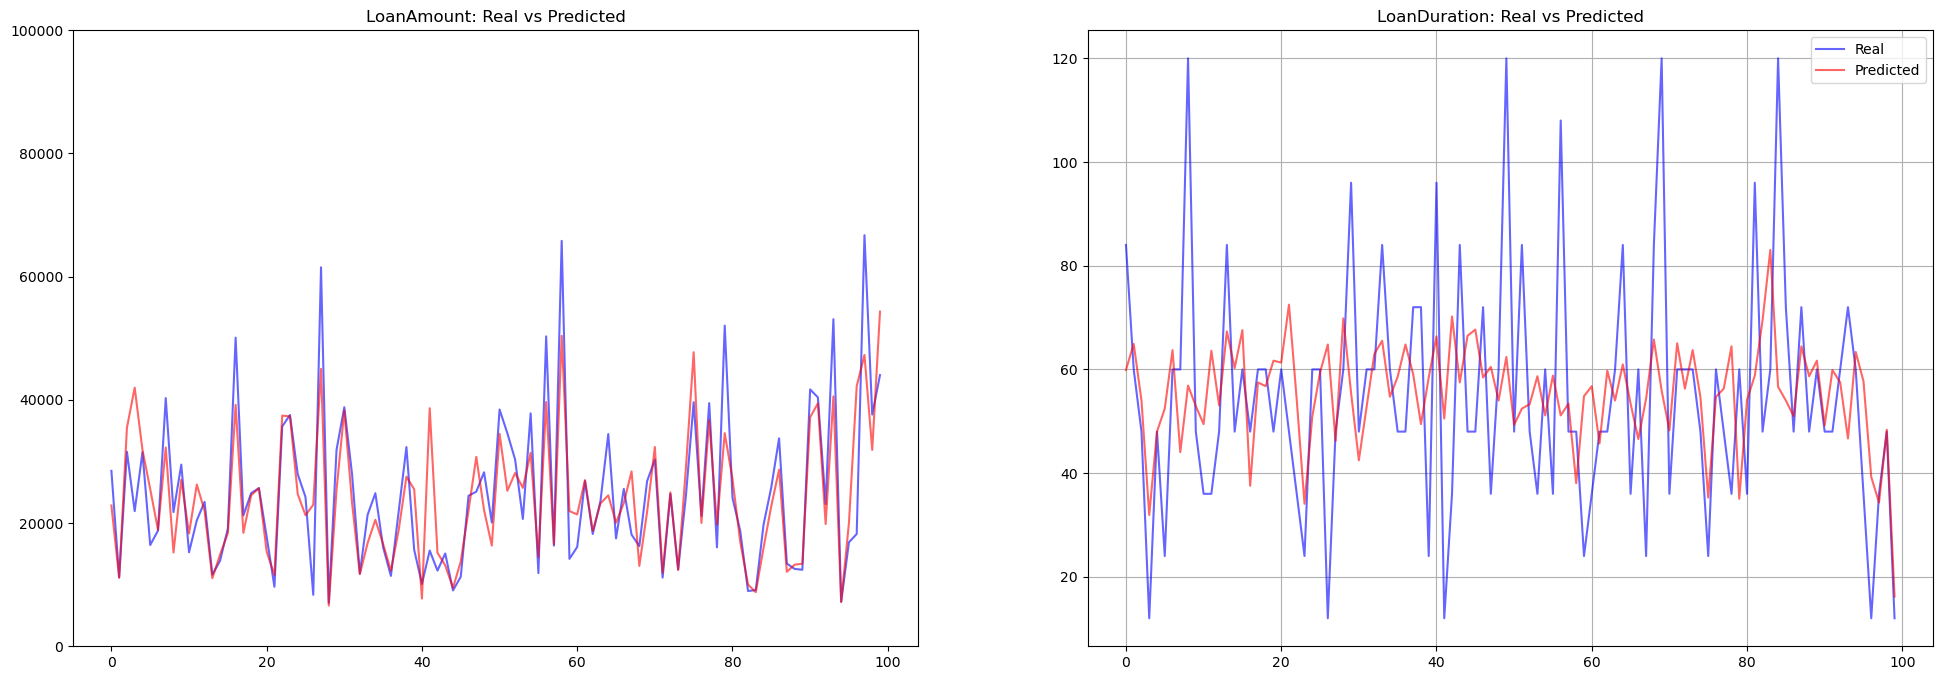

In [14]:
y_pred = pd.DataFrame(y_pred)

fig, ax = plt.subplots(1,2, figsize=(24, 8))

# Wykres dla LoanAmount
ax[0].plot(range(100), y_test.iloc[0:100, 0], color='blue', label='Real', alpha=0.6)
ax[0].plot(range(100), y_pred.iloc[0:100, 0], color='red', label='Predicted', alpha=0.6)
ax[0].set_title('LoanAmount: Real vs Predicted')
ax[0].set_ylim(0, 100_000)
ax[0].set_xlabel('')
ax[0].set_ylabel('')


ax[1].plot(range(100), y_test.iloc[0:100, 1], color='blue', label='Real', alpha=0.6)
ax[1].plot(range(100), y_pred.iloc[0:100, 1], color='red', label='Predicted', alpha=0.6)
ax[1].set_title('LoanDuration: Real vs Predicted')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.legend()
plt.grid(True)
plt.show()


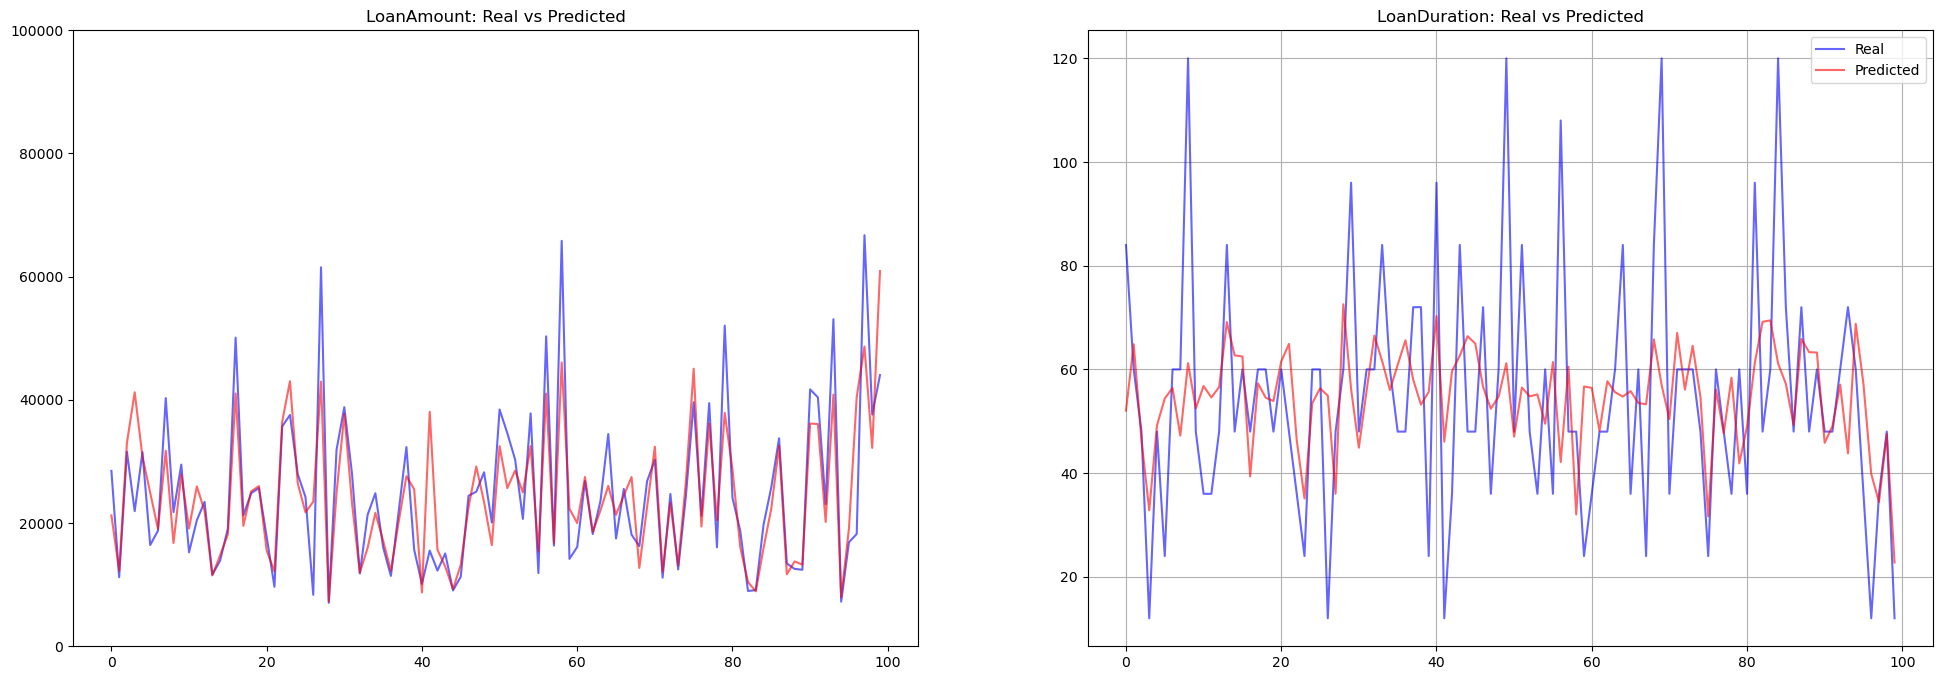

In [15]:
y_pred2 = pd.DataFrame(y_pred2)

fig, ax = plt.subplots(1,2, figsize=(24, 8))

# Wykres dla LoanAmount
ax[0].plot(range(100), y_test.iloc[0:100, 0], color='blue', label='Real', alpha=0.6)
ax[0].plot(range(100), y_pred2.iloc[0:100, 0], color='red', label='Predicted', alpha=0.6)
ax[0].set_title('LoanAmount: Real vs Predicted')
ax[0].set_ylim(0, 100_000)
ax[0].set_xlabel('')
ax[0].set_ylabel('')


ax[1].plot(range(100), y_test.iloc[0:100, 1], color='blue', label='Real', alpha=0.6)
ax[1].plot(range(100), y_pred2.iloc[0:100, 1], color='red', label='Predicted', alpha=0.6)
ax[1].set_title('LoanDuration: Real vs Predicted')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.legend()
plt.grid(True)
plt.show()


In [16]:
clientdata = {'Age': [20],
              'AnnualIncome': [20000],
              'EmploymentStatus': [1],
              'EducationLevel': [2],
              'Experience': [15],
              'MaritalStatus': [1],
              'NumberOfDependents': [2],
              'MonthlyDebtPayments': [300],
              'BankruptcyHistory': [0.1],
              'SavingsAccountBalance': [5000],
              'CheckingAccountBalance': [2000],
              'TotalAssets': [9.696440e+04],
              'TotalLiabilities': [3.625241e+04],
              'MonthlyIncome': [5000],
              'JobTenure': [3],
              'NetWorth': [7.229432e+03],
              'MonthlyLoanPayment': [500]
        }

client = pd.DataFrame(clientdata)

In [17]:
y_val = model.predict(client)
y = pd.DataFrame(y_val)

In [18]:
y_val

array([[16950.9,    65.4]])

In [20]:
y

,0,1
0,16950.9,65.4


In [19]:
wynik = y_val[:,0] / y_val[:,1]

print(f"Maksymalna zdolność kredytowa: {y.iloc[0, 0]:.2f}")
print(f"Minimalna ilość miesięcy kredytu(dla kwoty maksymalnej) {np.ceil(y.iloc[0,1]):.0f}")
print(f"Maksymalna rata miesięczna: {wynik[0]:.2f} dolary")


max_loan_amount = y.iloc[0, 0]
max_loan_months = np.ceil(y.iloc[0,1])
max_monthly_payment = max_loan_amount / max_loan_months

Maksymalna zdolność kredytowa: 16950.90
Minimalna ilość miesięcy kredytu(dla kwoty maksymalnej) 66
Maksymalna rata miesięczna: 259.19 dolary


In [21]:
from IPython.display import display
import ipywidgets as widgets

In [22]:
# rozwiązanie widget'owe

style = {'description_width': 'initial'}

age = widgets.IntText(value=20, description='Age:', style=style)
annual_income = widgets.FloatText(value=20000, description='Annual Income:', style=style)
employment_status = widgets.Dropdown(options=mapping1.keys(), description='Employment Status:', style=style)
education_level = widgets.Dropdown(options=mapping2.keys(), description='Education Level:', style=style)
experience = widgets.IntText(value=15, description='Experience:', style=style)
marital_status = widgets.Dropdown(options=mapping3.keys(), description='Marital Status:', style=style)
number_of_dependents = widgets.IntText(value=2, description='Number of Dependents:', style=style)
monthly_debt_payments = widgets.FloatText(value=300, description='Monthly Debt Payments:', style=style)
bankruptcy_history = widgets.FloatText(value=0.1, description='Bankruptcy History:', style=style)
savings_account_balance = widgets.FloatText(value=5000, description='Savings Account Balance:', style=style)
checking_account_balance = widgets.FloatText(value=2000, description='Checking Account Balance:', style=style)
total_assets = widgets.FloatText(value=96964.40, description='Total Assets:', style=style)
total_liabilities = widgets.FloatText(value=36252.41, description='Total Liabilities:', style=style)
monthly_income = widgets.FloatText(value=5000, description='Monthly Income:', style=style)
job_tenure = widgets.IntText(value=3, description='Job Tenure:', style=style)
net_worth = widgets.FloatText(value=7229.432, description='Net Worth:', style=style)
monthly_loan_payment = widgets.FloatText(value=500, description='Monthly Loan Payment:', style=style)

loan_amount_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=max_loan_amount,
    step=100,
    description="Loan Amount:",
    style=style,
    continuous_update=True
)

loan_months_slider = widgets.IntSlider(
    value=0,
    min=1,
    max=180,
    step=1,
    description="Loan Months:",
    style=style,
    continuous_update=True
)

interest_rate = 0.05

def update_months_range(change):
    loan_amount = change['new']

    monthly_interest_rate = interest_rate / 12

    if loan_amount > 0:
        total_interest = loan_amount * interest_rate
        total_loan_with_interest = loan_amount + total_interest

        min_months = max(1, int(total_loan_with_interest / max_monthly_payment)) + 1
    else:
        min_months = 1

    loan_months_slider.min = min_months
    loan_months_slider.max = 180

    if loan_months_slider.value < min_months:
        loan_months_slider.value = min_months

loan_amount_slider.observe(update_months_range, names='value')

display(age, annual_income, employment_status, education_level, experience, marital_status,
        number_of_dependents, monthly_debt_payments, bankruptcy_history, savings_account_balance,
        checking_account_balance, total_assets, total_liabilities, monthly_income, job_tenure,
        net_worth, monthly_loan_payment, loan_amount_slider, loan_months_slider)

IntText(value=20, description='Age:', style=DescriptionStyle(description_width='initial'))

FloatText(value=20000.0, description='Annual Income:', style=DescriptionStyle(description_width='initial'))

Dropdown(description='Employment Status:', options=('Employed', 'Self-Employed', 'Unemployed'), style=Descript…

Dropdown(description='Education Level:', options=('High School', 'Associate', 'Bachelor', 'Master', 'Doctorate…

IntText(value=15, description='Experience:', style=DescriptionStyle(description_width='initial'))

Dropdown(description='Marital Status:', options=('Single', 'Married', 'Divorced', 'Widowed'), style=Descriptio…

IntText(value=2, description='Number of Dependents:', style=DescriptionStyle(description_width='initial'))

FloatText(value=300.0, description='Monthly Debt Payments:', style=DescriptionStyle(description_width='initial…

FloatText(value=0.1, description='Bankruptcy History:', style=DescriptionStyle(description_width='initial'))

FloatText(value=5000.0, description='Savings Account Balance:', style=DescriptionStyle(description_width='init…

FloatText(value=2000.0, description='Checking Account Balance:', style=DescriptionStyle(description_width='ini…

FloatText(value=96964.4, description='Total Assets:', style=DescriptionStyle(description_width='initial'))

FloatText(value=36252.41, description='Total Liabilities:', style=DescriptionStyle(description_width='initial'…

FloatText(value=5000.0, description='Monthly Income:', style=DescriptionStyle(description_width='initial'))

IntText(value=3, description='Job Tenure:', style=DescriptionStyle(description_width='initial'))

FloatText(value=7229.432, description='Net Worth:', style=DescriptionStyle(description_width='initial'))

FloatText(value=500.0, description='Monthly Loan Payment:', style=DescriptionStyle(description_width='initial'…

FloatSlider(value=0.0, description='Loan Amount:', max=16950.9, step=100.0, style=SliderStyle(description_widt…

IntSlider(value=1, description='Loan Months:', max=180, min=1, style=SliderStyle(description_width='initial'))

In [23]:
def get_client_data():
    clientdata = {
        'Age': [age.value],
        'AnnualIncome': [annual_income.value],
        'EmploymentStatus': [mapping1[employment_status.value]],
        'EducationLevel': [mapping2[education_level.value]],
        'Experience': [experience.value],
        'MaritalStatus': [mapping3[marital_status.value]],
        'NumberOfDependents': [number_of_dependents.value],
        'MonthlyDebtPayments': [monthly_debt_payments.value],
        'BankruptcyHistory': [bankruptcy_history.value],
        'SavingsAccountBalance': [savings_account_balance.value],
        'CheckingAccountBalance': [checking_account_balance.value],
        'TotalAssets': [total_assets.value],
        'TotalLiabilities': [total_liabilities.value],
        'MonthlyIncome': [monthly_income.value],
        'JobTenure': [job_tenure.value],
        'NetWorth': [net_worth.value],
        'MonthlyLoanPayment': [monthly_loan_payment.value]
    }
    return pd.DataFrame(clientdata)

client = get_client_data()
y_val = model.predict(client)
y = pd.DataFrame(y_val)
wynik = y_val[:,0] / y_val[:,1]

print(f"Maksymalna zdolność kredytowa: {y.iloc[0, 0]:.2f}")
print(f"Minimalna ilość miesięcy kredytu(dla kwoty maksymalnej) {np.ceil(y.iloc[0,1]):.0f}")
print(f"Maksymalna rata miesięczna: {wynik[0]:.2f} dolary\n")

loan_amount_slider.max = y.iloc[0, 0]
loan_amt = loan_amount_slider.value
loan_mths = loan_months_slider.value

total_interest = loan_amt * (interest_rate * loan_mths / 12)
total_loan_with_interest = loan_amt + total_interest

if loan_mths > 0:
    monthly_payment = total_loan_with_interest / loan_mths
    if monthly_payment <= max_monthly_payment:
        print(f"Kwota kredytu: {loan_amt:.2f} dolary")
        print(f"Liczba miesięcy: {loan_mths}")
        print(f"Rata miesięczna: {monthly_payment:.2f} dolary")
    else:
        print("Maksymalna rata miesięczna została przekroczona. Zmniejsz kwotę kredytu lub zwiększ liczbę miesięcy.")
else:
    print("Liczba miesięcy musi być większa niż 0.")

Maksymalna zdolność kredytowa: 17102.60
Minimalna ilość miesięcy kredytu(dla kwoty maksymalnej) 69
Maksymalna rata miesięczna: 250.48 dolary

Kwota kredytu: 0.00 dolary
Liczba miesięcy: 1
Rata miesięczna: 0.00 dolary


In [24]:
# rozwiązanie gradio

import gradio as gr

In [56]:
def get_client_data(age, annual_income, employment_status, education_level, experience, marital_status,
                    number_of_dependents, monthly_debt_payments, bankruptcy_history, savings_account_balance,
                    checking_account_balance, total_assets, total_liabilities, monthly_income, job_tenure,
                    net_worth, monthly_loan_payment, loan_amount, loan_months):

    # Tworzymy dane wejściowe
    clientdata = {
        'Age': [age],
        'AnnualIncome': [annual_income],
        'EmploymentStatus': [mapping1[employment_status]],
        'EducationLevel': [mapping2[education_level]],
        'Experience': [experience],
        'MaritalStatus': [mapping3[marital_status]],
        'NumberOfDependents': [number_of_dependents],
        'MonthlyDebtPayments': [monthly_debt_payments],
        'BankruptcyHistory': [bankruptcy_history],
        'SavingsAccountBalance': [savings_account_balance],
        'CheckingAccountBalance': [checking_account_balance],
        'TotalAssets': [total_assets],
        'TotalLiabilities': [total_liabilities],
        'MonthlyIncome': [monthly_income],
        'JobTenure': [job_tenure],
        'NetWorth': [net_worth],
        'MonthlyLoanPayment': [monthly_loan_payment]
    }

    client = pd.DataFrame(clientdata)
    y_val = model.predict(client)
    y = pd.DataFrame(y_val)
    wynik = y_val[:,0] / y_val[:,1]

    result = f"Maksymalna kwota kredytu: {y.iloc[0,0]:.2f} USD\n"
    result += f"Minimalna liczba miesięcy: {np.ceil(y.iloc[0,1]):.0f}\n"
    result += f"Maksymalna miesięczna rata: {wynik[0]:.2f} USD \n"

    if ((loan_amount > y.iloc[0,0]) or (loan_months < np.ceil(y.iloc[0,1])) or ((loan_amount/loan_months) > wynik[0])):
        result += "Maksymalna rata miesięczna została przekroczona. Zmniejsz kwotę kredytu lub zwiększ liczbę miesięcy."
    else: 
        result += f"Kwota kredytu: {loan_amount:.2f} dolary \n"
        result += f"Liczba miesięcy: {loan_months} \n"
        result += f"Rata miesięczna: {(loan_amount/loan_months):.2f} dolary \n"

    return result


with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# Kalkulator kredytowy dla Twojego banku")
    with gr.Row():
        with gr.Column():
            age = gr.Slider(minimum=18, maximum=100, value=30, label="Age")
            annual_income = gr.Slider(minimum=1000, maximum=1000000, value=50000, label="Annual Income")
            employment_status = gr.Radio(choices=["Employed", "Unemployed"], value="Employed", label="Employment Status")
            education_level = gr.Dropdown(choices=["High School", "Bachelor", "Master", "PhD"], value="Bachelor", label="Education Level")
            experience = gr.Slider(minimum=0, maximum=40, value=10, label="Experience")
            marital_status = gr.Radio(choices=["Single", "Married"], value="Single", label="Marital Status")
            number_of_dependents = gr.Slider(minimum=0, maximum=10, value=2, label="Number of Dependents")
            monthly_debt_payments = gr.Slider(minimum=0, maximum=5000, value=200, label="Monthly Debt Payments")
        with gr.Column():
            bankruptcy_history = gr.Slider(minimum=0, maximum=1, value=0.05, label="Bankruptcy History")
            savings_account_balance = gr.Slider(minimum=0, maximum=50000, value=10000, label="Savings Account Balance")
            checking_account_balance = gr.Slider(minimum=0, maximum=50000, value=10000, label="Checking Account Balance")
            total_assets = gr.Slider(minimum=0, maximum=1000000, value=500000, label="Total Assets")
            total_liabilities = gr.Slider(minimum=0, maximum=1000000, value=250000, label="Total Liabilities")
            monthly_income = gr.Slider(minimum=1000, maximum=100000, value=4000, label="Monthly Income")
            job_tenure = gr.Slider(minimum=0, maximum=40, value=5, label="Job Tenure")
            net_worth = gr.Slider(minimum=0, maximum=1000000, value=50000, label="Net Worth")
            monthly_loan_payment = gr.Slider(minimum=0, maximum=5000, value=500, label="Monthly Loan Payment")
    with gr.Row():
        loan_amount = gr.Slider(minimum=0, maximum=100000, value=0, step=100, label="Loan Amount")
        loan_months = gr.Slider(minimum=1, maximum=120, value=0, label="Loan Months")
    
    # Pole wynikowe
    output = gr.Textbox(label="Loan Prediction Results")
    
    # Przycisk wywołujący funkcję
    gr.Button("Sprawdź możliwości", elem_id="predict_button").click(
        fn=get_client_data,
        inputs=[
            age, annual_income, employment_status, education_level, experience, marital_status,
            number_of_dependents, monthly_debt_payments, bankruptcy_history, savings_account_balance,
            checking_account_balance, total_assets, total_liabilities, monthly_income, job_tenure,
            net_worth, monthly_loan_payment, loan_amount, loan_months
        ],
        outputs=output
    )

demo.launch()

* Running on local URL:  http://127.0.0.1:7880

To create a public link, set `share=True` in `launch()`.


In [29]:
get_client_data.shape()

AttributeError: 'function' object has no attribute 'shape'